# Visualização de Dados

Nas aulas anteriores nós trabalhamos a construção de distribuições de frequências, usando tabelas, dos conjuntos de dados crus que nós analisamos. 

Nas próximas aulas nós veremos como essas distribuições podem ser representadas visualmente, por meio de gráficos ao invés de tabelas.

Gráficos são ferramentas essenciais na análise de dados e seu uso, tipicamente, causa impactos nos leitores de suas análises muito maiores que apresentação de medidas e/ou tabelas. Arrisco dizer que, sem gráficos, os dados não estão completamente analisados.

Existem diversas bibliotecas em Python para visualização de dados: a [matplotlib](https://matplotlib.org/), biblioteca básica de geração de gráficos em Python, que possibilita a criação de uma enorme gama de gráficos com alta qualidade de acabamento e com grande possibilidade de customização; a [seaborn](https://seaborn.pydata.org/), biblioteca derivada da `matplotlib`, especializada em gráficos estatísticos, com funções que facilitam a interação do usuário para a geração de gráficos, tornando o trabalho mais simples do que usando a `matplotlib` diretamente; a [plotly](https://plot.ly/) e a [bokeh](https://bokeh.pydata.org/en/latest/), que permitem construir, de forma relativamente simples, gráficos interativos e _dashboards_ ([O que é um dashboard?](http://marketingpordados.com/analise-de-dados/o-que-e-dashboard-%F0%9F%93%8A/)).

Para a nossa disciplina, nós faremos uso "indireto" da `matplotlib`, chamando-a por meio da `pandas`, que possui algumas funções internas que chamam diretamente funções da `matplotlib` (ver documentação [aqui](http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots)). Eventualmente, usaremos funções das outras bibiotecas apresentadas aqui.

Além disso, nos basearemos bastante nos exemplos disponíveis no site [Python Graph Gallery](https://python-graph-gallery.com/), um excelente repositório (julgo ser o melhor) para exemplos de códigos para gerar diversos tipos de gráficos em python e no [The Data Visualisation Catalogue](https://datavizcatalogue.com), repositório com a descrição de funcionalidades e construção de vários tipos de gráficos. 

Mesmo com essas funções chamando indiretamente cada função de geração de gráficos, é interessante, para certas configurações que possam surgir, criamos o hábito de importar a biblioteca `matplotlib`, especificamente o submódulo `pyplot`, onde se encontram todas as funções responsáveis pel geração dos gráficos.

Assim,

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Aqui vale um comentário importante. 

Para que o gráfico apareça, tipicamente, temos que usar o método `plt.show()` logo abaixo do gráfico. Essa função, obviamente, mostra o gráfico em uma janela (quando executamos o código `.py` em uma IDE convencional ou quando executamos comandos em um terminal) ou _inline_, quando usamos um notebook. 

Acontece que notebooks herdaram comandos especiais do IPython, e temos uma opção mais elegante para não ficar escrevendo `plt.show()`o tempo inteiro: basta colocar, logo após importar a biblioteca, o comando `%matplotlib inline`. Feito isso, não existe mais a necessidade de escrever o `plt.show()` após cada gráfico gerado.

Vale salientar também que versões mais recentes do Jupyter Noteboob trazem o comando por padrão, não sendo necessário, nesses casos, explicitá-lo. 

In [2]:
%matplotlib inline

Caso queira que apareça uma janela fora do notebook para visualização do gráfico (opção interessante quando temos muitos gráficos dentro do notebook), basta substituir `inline` por `qt` no comando acima, escrevendo

In [ ]:
%matplotlib qt

## Gerando um primeiro gráfico: o gráfico em linha

O gráfico mais básico que podemos gerar em qualquer biblioteca de visualização de dados é um gráfico em linha. Basicamente, gráficos em linha são gráficos feitos a partir de um plano cartesiano, interligando pares de ponto nesse plano, como ilustrado na figura abaixo.

![](line_graph.png)

Para plotar um gráfico em linha, a biblioteca `matplotlib` tem a função `plot`, cujos argumentos básicos são os conjuntos de valores de $x$ e $y$, tipicamente numéricos.

Vejamos um exemplo:

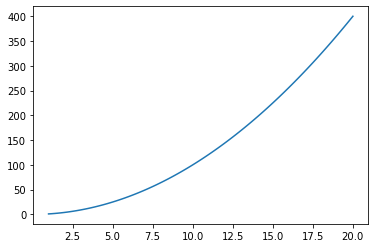

In [3]:
x = np.linspace(1,20,100)
y = x**2
plt.plot(x,y)

\begin{exercise}
Dê uma olhada na documentação da função [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), e veja como modificar o tipo de linha, a cor dela, acrescentar um _grid_ e um título ao seu gráfico e aos eixos.
\end{exercise}


Para gráficos estatísticos, podemos usar, ao invés de chamar diretamente a `matplotlib`, podemos usar o método `plot` da `pandas` que, basicamente, chama indiretamente a função da `matplotlib`, mas de uma forma muito mais integrável às estruturas de dados da `pandas`.

Como um exemplo básico, podemos transformar a função criada no exemplo anterior em uma `series` e, então, plotar seu gráfico.

In [4]:
ts = pd.Series(y)
ts

0       1.000000
1       1.420671
2       1.915009
3       2.483012
4       3.124681
         ...    
95    369.882257
96    377.301194
97    384.793797
98    392.360065
99    400.000000
Length: 100, dtype: float64

<AxesSubplot:>

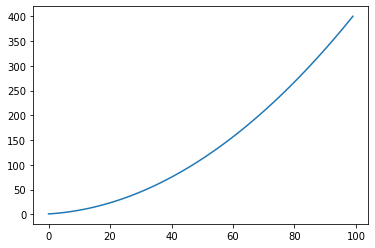

In [5]:
ts.plot()

Obviamente, obteremos o mesmo resultado.

\begin{exercise}
As configurações feitas no exercício anterior podem ser usadas também no método __plot__ da __pandas__?
\end{exercise}


_Resposta:_

Ver a documentação disponível [aqui](https://pandas.pydata.org/pandas-docs/stable/visualization.html#general-plot-style-arguments).

No caso, podemos fazer

<AxesSubplot:>

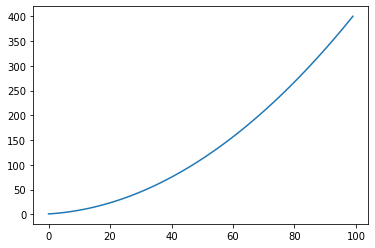

In [6]:
ts.plot(style='')

No contexto de estatística, o gráfico em linha é bastante utilizado para mostrar evolução de um conjunto de dados, tipicamente de dados que variam ao longo do tempo. Conjuntos de dados assim são chamados de séries temporais.

O exemplo a seguir cria uma série temporal com dados sintéticos (criados artificialmente), e plota o gráfico da soma cumulativa desses valores.

Os dados, basicamente, são 1000 valores aleatórios gerados com uma distribuição gaussiana, alocados para uma janela de tempo de 1000 dias a contar de 01/01/2000 (a `pandas` tem um conjunto de métodos bem interessantes para se trabalhar com datas e tempo).

In [7]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2000', 
                                   periods=1000)).cumsum()
ts

2000-01-01   -0.408621
2000-01-02   -2.447972
2000-01-03   -1.771536
2000-01-04   -0.863058
2000-01-05   -0.470860
                ...   
2002-09-22   -0.368114
2002-09-23   -1.149006
2002-09-24   -1.985911
2002-09-25   -3.168824
2002-09-26   -3.797017
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

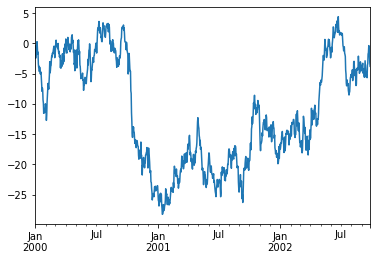

In [8]:
ts.plot()

O mesmo método `plot` também pode ser usado diretamente em um dataframe, gerando uma curva diferente para cada uma das variáveis (colunas) disponíveis no conjunto de dados.

In [9]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('ABCD')).cumsum()
df

,A,B,C,D
2000-01-01,0.647921,1.180996,-0.979225,-0.912660
2000-01-02,2.278844,-0.694890,-1.163107,-0.805070
2000-01-03,1.522433,-0.741834,-2.284228,0.113778
2000-01-04,1.332118,-1.548689,-0.748482,-0.472171
2000-01-05,1.882884,-0.661506,0.998060,0.020207
...,...,...,...,...
2002-09-22,-5.971623,-11.927201,20.507743,10.499942
2002-09-23,-4.037706,-12.400231,20.719452,10.188510
2002-09-24,-4.698665,-10.956972,21.547142,8.970575
2002-09-25,-2.153245,-10.532931,21.523703,9.455651


<AxesSubplot:>

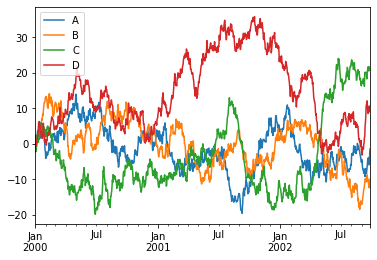

In [10]:
df.plot()

Nós exploraremos dados de séries temporais em alguns exemplos ao longo do curso. Nesse momento, precisamos conhecer alguns gráficos básicos, bastante comuns, que servirão de base para construção de gráficos mais elaborados ou como comparativo para outras análises gráficas.

Em aulas anteriores, nós falamos sobre distribuições de frequência de variáveis qualitativas e quantitativas, vimos como fazer essas distribuições e, conforme dito na aula, foi destacado que classificar variáveis tem grande importância, pois os métodos de análise dos dados mudam de acordo com o tipo de variável.

Isso não é diferente para gráficos. Existem gráficos que são exclusivamente usados para dados categóricos, outros para dados numéricos. Essa será nossa primeira separação.

Os gráficos gerados nas sessões seguintes são, basicamente, representações gráficas das distribuições de frequência estudadas anteriormente. Cada parte ou representação desses gráficos diz respeito a uma categoria, ou classe numérica vista nas tabelas de distribuição de frequência.

## Gráficos básicos para variáveis qualitativas

### Gráficos em setores

O gráfico em setores (ou pizza, ou torta, ou setorizado) é um tipo bastante comum de gráfico, extensivamente usado em ambientes empresariais e escritórios para apresentar resultados.

Basicamente, o gráfico representa cada proporção da frequência relativa como uma "fatia" ou setor, obtida pela divisão do círculo pelo ângulo associado à essa proporção. Assim como a soma de todas as frequências relativas deve somar $100\%$ (se representada de forma percentual), a soma de todos os ângulos de cada setor deve somar $360°$.

O gráfico abaixo ilustra a anatomia desse tipo de gráfico. Logo em seguida, nós executamos esse mesmo exemplo usando o método `pie`, da `Pandas`.

![](pie_chart.png)

Primeiro, criaremos uma `Series` com resultados (escolhidos por mim) que condizem com os da figura acima.

In [11]:
var = pd.Series(['Rock','Paper','Rock','Scissor','Scissor',
                 'Paper', 'Paper', 'Scissor', 'Scissor'])
var

0       Rock
1      Paper
2       Rock
3    Scissor
4    Scissor
5      Paper
6      Paper
7    Scissor
8    Scissor
dtype: object

Podemos, então, obter as frequências absoluta e relativa desse conjunto de dados, inclusive em forma percentual, 

In [12]:
a = var.value_counts()
a

Scissor    4
Paper      3
Rock       2
dtype: int64

In [13]:
var.value_counts(normalize=True)*100

Scissor    44.444444
Paper      33.333333
Rock       22.222222
dtype: float64

e podemos, então, gerar o gráfico, como se segue, o argumento `figsize`, do método `pie`, basicamente tem a função de deixar o gráfico em proporção.

<AxesSubplot:ylabel='None'>

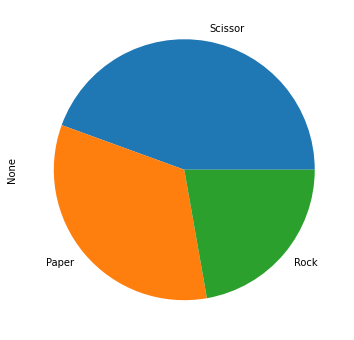

In [16]:
a.plot.pie(figsize=(6, 6))
# plt.title("Faltou Spock")

\begin{exercise}
Você deve ter percebido que o gráfico foi aplicado sobre a distribuição de frequência (a) e não o conjunto de dados crus (var). Explique porque isso é necessário. 
\end{exercise}


O método `pie` também pode ser usado diretamente em `DataFrames`, como ilustra o exemplo abaixo.

In [17]:
df = pd.DataFrame({'massa': [0.330, 4.87 , 5.97],
                   'raio': [2439.7, 6051.8, 6378.1]},
                   index=['Mercúrio', 'Vênus', 'Terra'])
df

,massa,raio
Mercúrio,0.33,2439.7
Vênus,4.87,6051.8
Terra,5.97,6378.1


<AxesSubplot:ylabel='raio'>

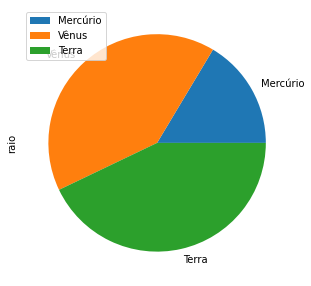

In [19]:
df.plot.pie(y='raio', figsize=(5, 5))

Usando o argumento `subplots=True` é possível gerar mais de um gráfico em setores do mesmo `DataFrame`.

array([<AxesSubplot:ylabel='massa'>, <AxesSubplot:ylabel='raio'>],
      dtype=object)

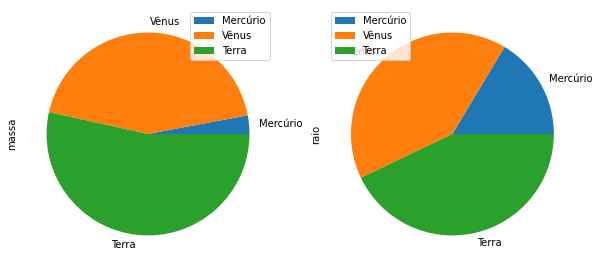

In [20]:
df.plot.pie(figsize=(10, 5), subplots=True)

\begin{exercise}
É possível gerar gráficos em setores de um DataFrame inteiro, sem selecionar uma coluna especificamente? Justifique sua resposta.
\end{exercise}

\begin{exercise}
Quais as desvantagens de se usar gráficos em setores? Pesquise nas referências disponíveis no começo desse notebook.
\end{exercise}



#### Uma variação mais elegante: o gráfico de rosca

Os gráficos em setores às vezes são criticados por induzirem os leitores a focar nas áreas proporcionais das fatias entre si e no gráfico como um todo. Isso dificulta a visualização das diferenças entre as fatias, especialmente quando você tenta comparar vários gráficos juntos.

Um gráfico de rosca, de certa forma, remedia esse problema ao não enfatizar o uso da área. Em vez disso, os leitores se concentram mais em ler o comprimento dos arcos, em vez de comparar as proporções entre as fatias.

Além disso, os gráficos de rosca são mais eficientes em termos de espaço do que os Gráficos de pizza, porque o espaço em branco dentro de um gráfico de rosca pode ser usado para exibir informações dentro dele.

Para criar um gráfico de rosca, basicamente nós criaremos um círculo branco e, depois, sobreporemos ele ao gráfico em setores convencional, usando os métodos [gcf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gcf.html) e [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html) da `matplotlib`.

In [31]:
circulo=plt.Circle( (0,0), 0.8, color='black')

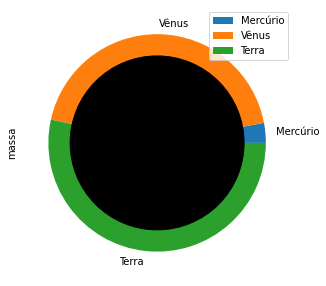

In [32]:
df.plot.pie(y='massa', figsize=(5, 5))
p=plt.gcf()
p.gca().add_artist(circulo)

\begin{exercise}
Como alterar as cores e a ordem das fatias de um gráfico em setores?
\end{exercise}


### Gráficos em barras para uma variável

O gráfico de barras clássico usa barras horizontais ou verticais (gráfico de colunas) para fazer comparações entre as categorias de uma dada variável, seja usando a frequência absoluta, seja a relativa. Um eixo do gráfico mostra as categorias específicas sendo comparadas e o outro eixo representa uma escala de valores discretos, como mostra a figura abaixo.

![](bar_chart.png)

As tabelas de barras são diferenciadas dos histogramas, pois não exibem desenvolvimentos contínuos durante um intervalo. Os dados discretos do gráfico de barras são dados categóricos e, portanto, respondem à pergunta "quantos?" em cada categoria.

No `pandas`, usamos o método `bar` para gerar gráficos em barras, como mostra o exemplo a seguir.

In [36]:
var

0       Rock
1      Paper
2       Rock
3    Scissor
4    Scissor
5      Paper
6      Paper
7    Scissor
8    Scissor
dtype: object

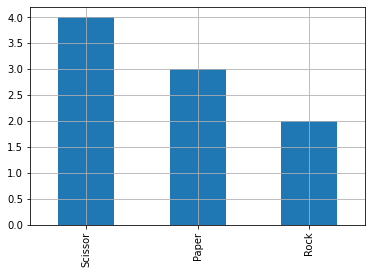

In [40]:
var.value_counts().plot.bar()
plt.grid()

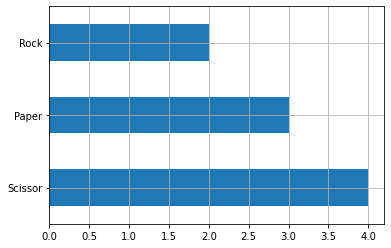

In [42]:
var.value_counts().plot.barh()
plt.grid()

Gráficos em barras também podem ser usados para valores numéricos

In [43]:
df = pd.DataFrame({'velocidade': [0.1, 17.5, 40, 48, 52, 69, 88], 
                   'tempo de vida': [2, 8, 70, 1.5, 25, 12, 28]}, 
                   index=['caracol', 'porco', 'elefante', 'coelho', 'girafa', 'coiote', 'cavalo'])
df

,velocidade,tempo de vida
caracol,0.1,2.0
porco,17.5,8.0
elefante,40.0,70.0
coelho,48.0,1.5
girafa,52.0,25.0
coiote,69.0,12.0
cavalo,88.0,28.0


<AxesSubplot:>

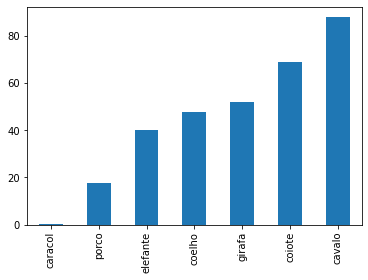

In [34]:
df['velocidade'].plot.bar()

\begin{exercise}
Gerer um gráfico em setores da mesma variável do gráfico acima e compare os dois gráficos, enfatizando, principalmente, a transmissão da informação para o leitor. 
\end{exercise}


Uma grande falha nos gráficos de barras é que a rotulagem se torna problemática quando há um grande número de barras. Por esse motivo, existe uma variação do método `bar`, o `barh`que gera o gráfico com as barras dispostas horizontalmente. Assim, o exemplo anterior pode aparecer como

<AxesSubplot:>

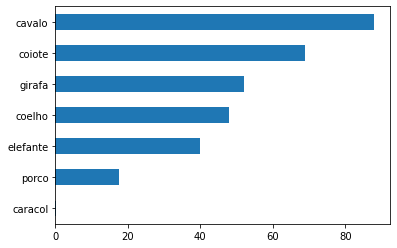

In [44]:
df['velocidade'].plot.barh()

Foi visto também que, quando queremos investigar a relação entre duas variáveis categóricas, construir tabelas de contingência são uma excelente escolha para verificar essas relações. Um exemplo disso é o próprio `DataFrame` desse exemplo que relaciona as espécimes animais com duas de suas características.

Até agora, todos os exemplos de gráficos em barra foram feitos para um só atributo, nesse contexto. 

No caso de um `DataFrame`, para fazer isso, podemos plotar os gráficos de cada atributo lado a lado, usando o argumento `subplots=True`, que possibilita, na mesma figura, ter dois gráficos.

array([<AxesSubplot:title={'center':'velocidade'}>,
       <AxesSubplot:title={'center':'tempo de vida'}>], dtype=object)

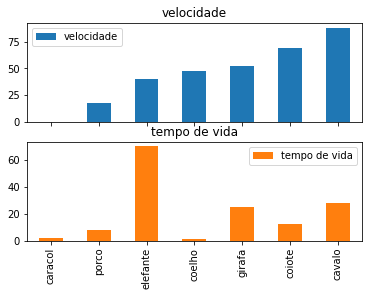

In [45]:
df.plot.bar(subplots=True)

\begin{exercise}
Explique o resultado obtido quando fazemos **df.plot.bar(y="velocidade", x='tempo de vida')**. E se invertermos $x$ e $y$?
\end{exercise}


### Gráficos em barras para várias variáveis: barras agrupadas e empilhadas

Esse arranjo de gráficos lado a lado nem sempre ajuda na comparação entre os atributos plotados. Para tal objetivo, pode-se fazer uso de um gráfico de barras agrupado. 

![](multiset_barchart.png)

Essa variação de um gráfico de barras é usada quando duas ou mais séries de dados são plotadas lado-a-lado e agrupadas em categorias, todas no mesmo eixo. Se quisermos representar uma tabela de contingência por gráficos em barras, por exemplo, agrupar as barras de todos os atributos considerados é uma excelente opção.

Como um gráfico de barras, o comprimento de cada barra é usado para mostrar comparações numéricas discretas entre as categorias. Cada série de dados é atribuída a uma cor individual ou a um tom variável da mesma cor, a fim de distingui-las. Cada grupo de barras é então espaçado um do outro.

Gráficos de barras agrupadas geralmente são usados para comparar variáveis ou categorias agrupadas a outros grupos com essas mesmas variáveis ou tipos de categorias. 

Para obter gráficos desse tipo, simplesmente temos de aplicar o método `bar` ao `DataFrame`, como se segue.

<AxesSubplot:>

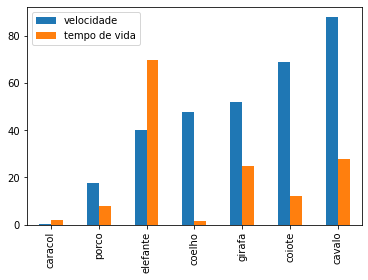

In [46]:
df.plot.bar()

<AxesSubplot:>

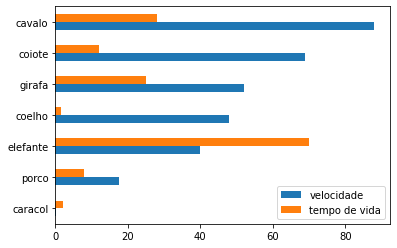

In [47]:
df.plot.barh()

Quando a quantidade de atributos é grande, esse formato dos gráficos dificulta a leitura, pois ou as barras se sobrepõe, ou sua espessura diminui a ponto de se ter dificuldade de identificar cada barra. Uma opção, nesses casos, é trabalhar com gráficos de barras empilhadas.

Ao contrário de um gráfico de barras agrupadas, que exibe suas barras lado a lado, os gráficos de barras empilhadas segmentam suas barras de vários conjuntos de dados uma sobre a outra. Eles são usados para mostrar como uma categoria maior é dividida em categorias menores e qual a relação de cada parte com a quantidade total. Existem dois tipos de gráficos de barras empilhadas:

* Gráficos de barras empilhadas simples: colocam cada valor para o segmento após o anterior. O valor total da barra é todos os valores do segmento adicionados juntos. Ideal para comparar as quantidades totais em cada grupo / barra segmentada.


* Gráficos de barras empilhadas percentuais: mostram a porcentagem de todo o grupo e são plotados pela porcentagem de cada valor para o valor total de cada grupo. Isso facilita a visualização das diferenças relativas entre as quantidades em cada grupo.


![](stacked_bar_graph.png)

Para fazer um gráfico de barras empilhadas, basta inserir o argumento `stacked=True` ao método `bar` em um `DataFrame`, como mostrado a seguir.

<AxesSubplot:>

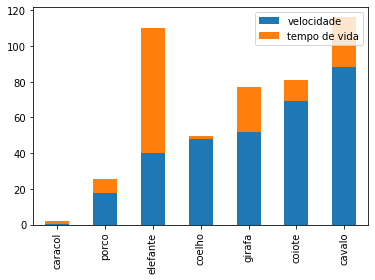

In [48]:
df.plot.bar(stacked=True)

\begin{exercise}
Repita o exemplo acima usando um gráfico em barras percentuais.
\end{exercise}


## Gráficos básicos para variáveis quantitativas

#### 1o. Caso: variáveis quantitativas com poucos valores distintos

Nesse caso, gráfico em barras resolve

In [56]:
df2 = pd.read_csv('Dados_moretin.csv', 
                  sep=';', decimal=',')
df2.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Região de Procedência
0,solteiro,ensino fundamental,NaN,4.00,26,interior
1,casado,ensino fundamental,1.0,4.56,32,capital
2,casado,ensino fundamental,2.0,5.25,36,capital
3,solteiro,ensino médio,NaN,5.73,20,outra
4,solteiro,ensino fundamental,NaN,6.26,40,outra


<AxesSubplot:>

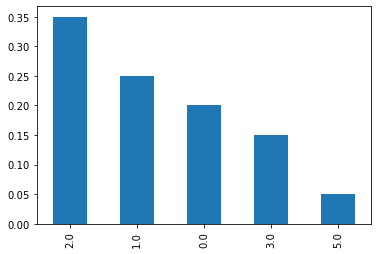

In [62]:
df2['N de Filhos'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

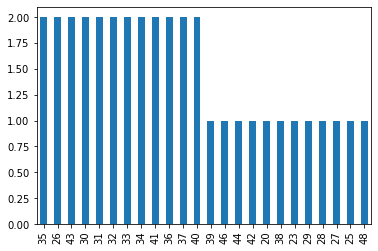

In [59]:
df2['Anos'].value_counts().plot.bar()

#### 2o. Caso: variáveis quantitativas com muitos valores distintos

Para variáveis quantitativas, _a priori_, veremos dois gráficos: o histograma e o gráfico de densidade. A medida que o curso evoluir, teremos mais alguns gráficos, como o box-plot, por exemplo, que servem para descrever a distribuição de dados numéricos.

Para exemplificar a criação desses gráficos usaremos o seguinte conjunto sintético de dados, 

### Histogramas

Um histograma visualiza a distribuição de dados em um intervalo contínuo ou em determinado período de tempo. Cada barra em um histograma representa a frequência tabulada em cada intervalo/caixa (_bins_).

Os histogramas ajudam a estimar onde os valores estão concentrados, quais são os extremos e se existem lacunas ou valores incomuns. Eles também são úteis para dar uma visão aproximada da distribuição de probabilidade.

![](histogram.png)

Para gerar histogramas a partir de `DataFrames`, temos o método `hist`, que pode ser usado como se segue:

In [63]:
df2.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Região de Procedência
0,solteiro,ensino fundamental,NaN,4.00,26,interior
1,casado,ensino fundamental,1.0,4.56,32,capital
2,casado,ensino fundamental,2.0,5.25,36,capital
3,solteiro,ensino médio,NaN,5.73,20,outra
4,solteiro,ensino fundamental,NaN,6.26,40,outra


<AxesSubplot:ylabel='Frequency'>

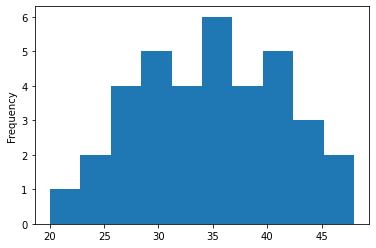

In [64]:
df2['Anos'].plot.hist(bins=10)

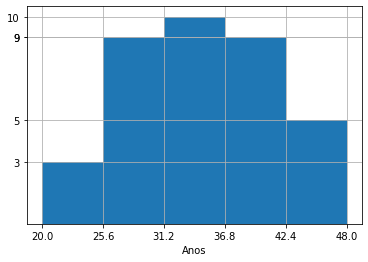

In [83]:
a,b,x = plt.hist(df2['Anos'],bins=5)
plt.xticks(b)
plt.yticks(a)
plt.xlabel('Anos')
plt.grid()

In [79]:
b

array([20. , 25.6, 31.2, 36.8, 42.4, 48. ])

\begin{exercise}
Nós vimos, um pouco atrás no curso o uso da função _hist_ da _matplotlib_. Gere os mesmos gráficos acima usando essa função e explique os valores que aparecem na saída dessa função.
\end{exercise}


\begin{exercise}
Gere histogramas de frequência relativa e acumulada, para os parâmetros dos exemplos acima. 
\end{exercise}


### Gráficos de densidade

Um gráfico de densidade visualiza uma estimação da distribuição de dados em um intervalo ou período de tempo contínuo. Este gráfico é uma variação de um histograma que usa suavização de _kernel_ (método para estimar o gráfico da densidade de probabilidade de uma distribuição) para plotar valores, permitindo distribuições mais suaves e contínuas. Os picos de um gráfico de densidade ajudam a exibir onde os valores são concentrados no intervalo.

Gráficos de densidade tipicamente não apresentam o problema que histogramas trazem com relação ao número de classes considerados na geração do gráfico. Poucas classes deixam a distribuição tipicamente uniforme, escondendo a real forma e muitas classes geram o problema de "vales" ou classes sem valores (ver exemplos abaixo). Esses problemas não ocorrem com gráficos de densidade.

<AxesSubplot:ylabel='Density'>

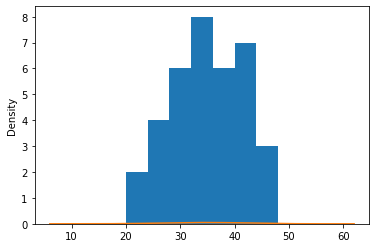

In [86]:
df2['Anos'].plot.hist(bins=7)
df2['Anos'].plot.kde()

O método `kde` da `Pandas` permite criar gráficos de densidade a partir de `DataFrames`, como ilustrado abaixo.

<AxesSubplot:ylabel='Density'>

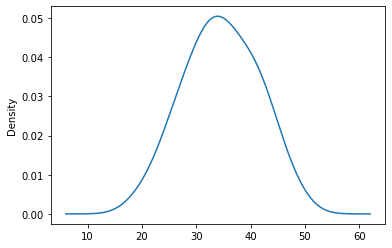

In [87]:
df2['Anos'].plot.kde()

In [88]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Anos', ylabel='Density'>

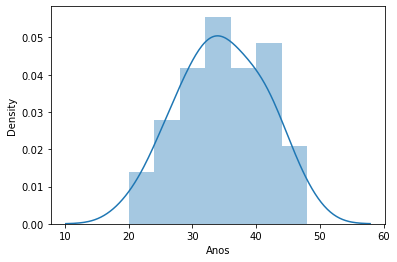

In [90]:
sns.distplot(df2['Anos'], bins=7)

\begin{exercise}
Para cada uma das colunas do dataframe "df2", gere um gráfico que contenha o histograma e o gráfico de densidade sobrepostos. Dica: veja a função _distplot_ da biblioteca Seaborn.
\end{exercise}


\begin{exercise}
Teste versões de todos os gráficos vistos aqui para o conjunto de dados **train.csv**.
\end{exercise}
